In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/iris(1).xls"
data= pd.read_excel(file) #reading file iris.xls"


In [37]:
data = pd.read_excel(file) #reading file

In [38]:
# Display the columns in the dataset
print(data)

      SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


In [39]:
# display headings
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [41]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [42]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

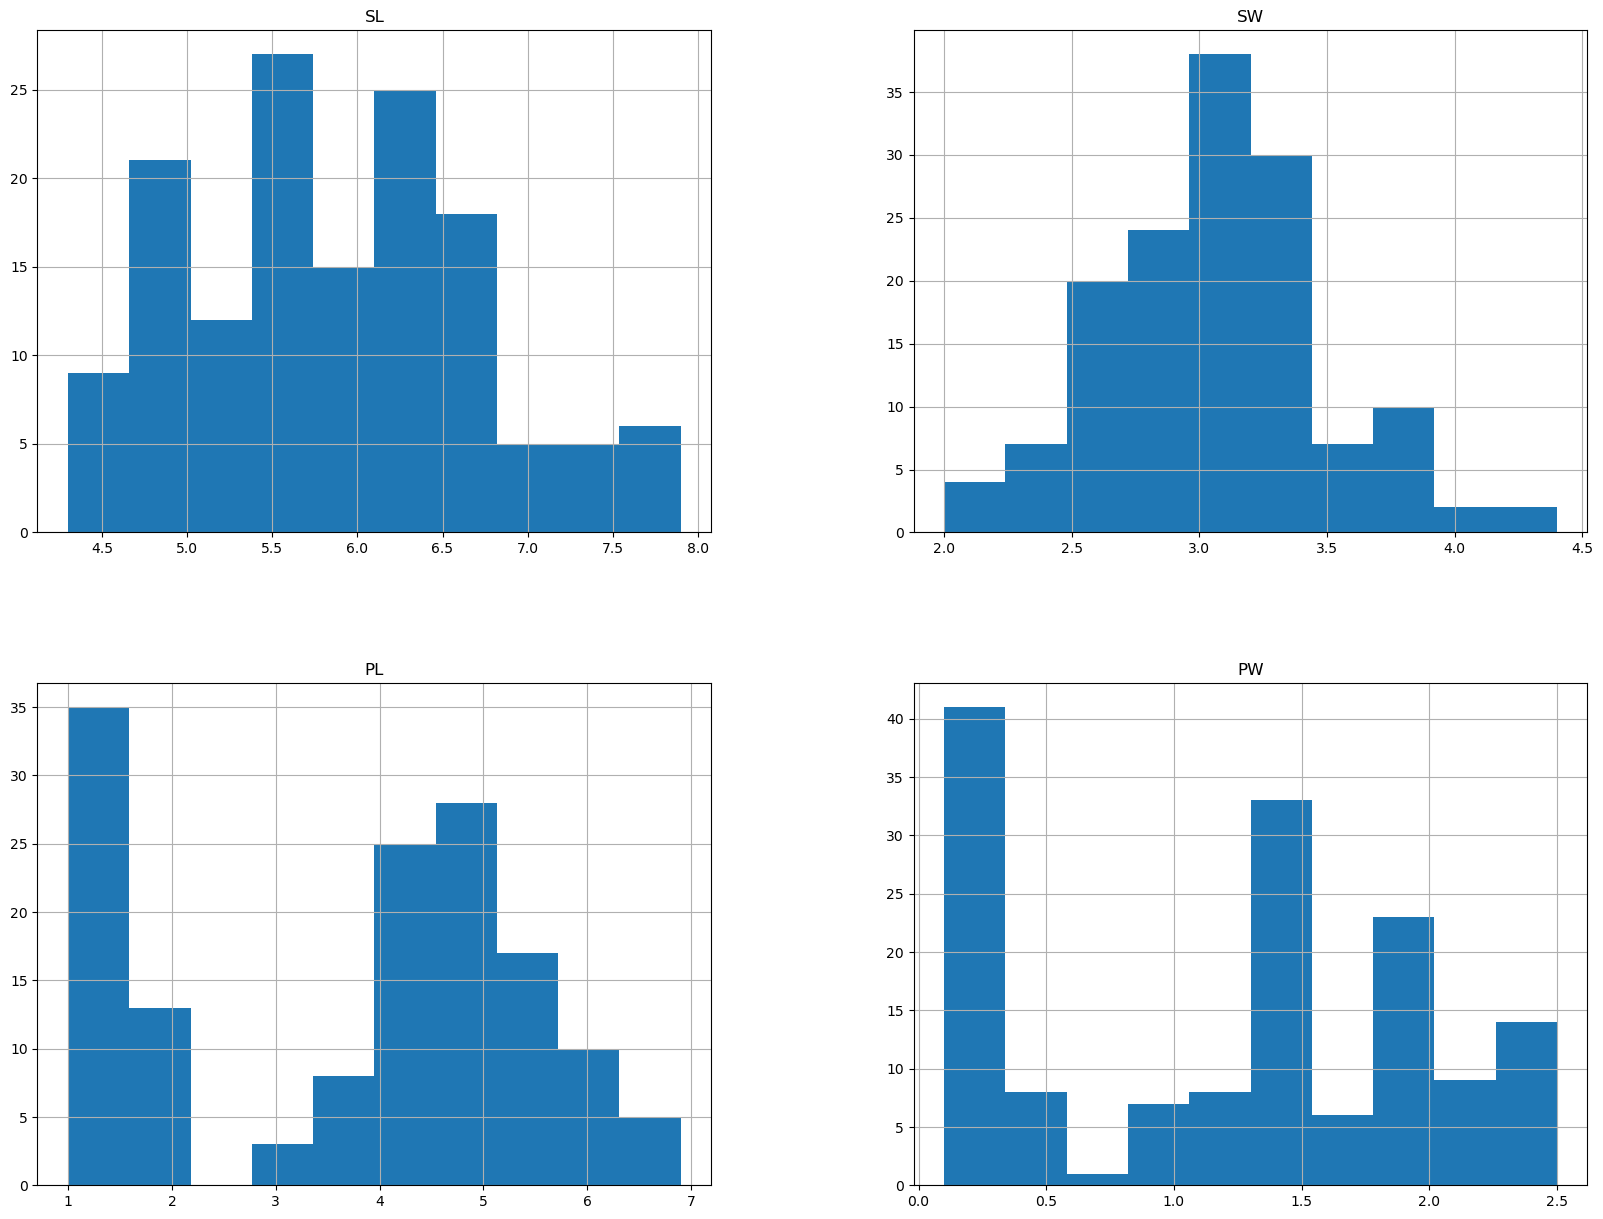

In [43]:
data.hist(figsize=(20,15))
plt.show()

In [44]:
# replacing missing values using median
for i in ['SL','SW','PL']:
    data[i]= data[i].fillna(data[i].median())


In [45]:
# check for missing values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [46]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
data.shape

(150, 5)

C:\Users\ppbin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


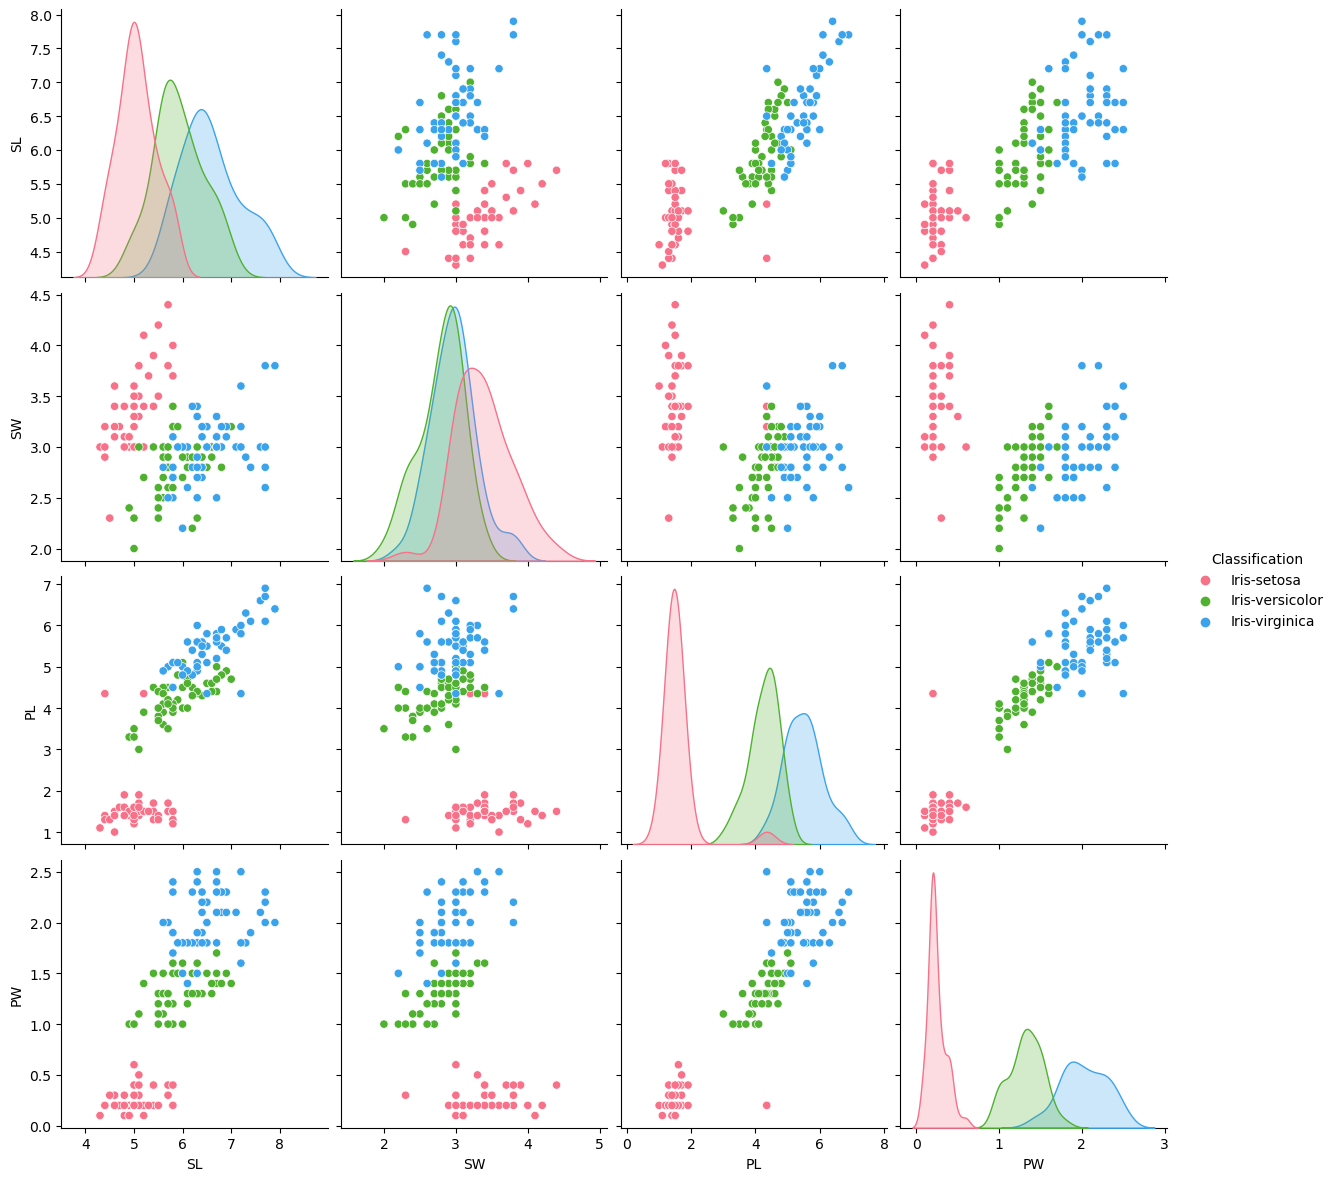

In [48]:
#  pairplot, which shows the bivariate relation
sns.pairplot(data, hue="Classification", palette="husl", size=3)

In [49]:
# classification using kNN and logistic regression

In [50]:
#### Split the data into x and y
X=data.iloc[:,0:4].values # removed SL
y=data.iloc[:,-1].values # classification

In [51]:
X

array([[5.1 , 3.5 , 1.4 , 0.2 ],
       [4.9 , 3.  , 1.4 , 0.2 ],
       [5.8 , 3.2 , 1.3 , 0.2 ],
       [4.6 , 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ],
       [5.4 , 3.9 , 1.7 , 0.4 ],
       [4.6 , 3.4 , 1.4 , 0.3 ],
       [5.  , 3.4 , 1.5 , 0.2 ],
       [4.4 , 2.9 , 1.4 , 0.2 ],
       [4.9 , 3.1 , 1.5 , 0.1 ],
       [5.4 , 3.  , 1.5 , 0.2 ],
       [4.8 , 3.4 , 1.6 , 0.2 ],
       [4.8 , 3.  , 1.4 , 0.1 ],
       [4.3 , 3.  , 1.1 , 0.1 ],
       [5.8 , 4.  , 1.2 , 0.2 ],
       [5.7 , 4.4 , 1.5 , 0.4 ],
       [5.4 , 3.9 , 1.3 , 0.4 ],
       [5.1 , 3.5 , 1.4 , 0.3 ],
       [5.7 , 3.8 , 1.7 , 0.3 ],
       [5.1 , 3.8 , 1.5 , 0.3 ],
       [5.4 , 3.4 , 1.7 , 0.2 ],
       [5.8 , 3.7 , 1.5 , 0.4 ],
       [4.6 , 3.6 , 1.  , 0.2 ],
       [5.1 , 3.3 , 1.7 , 0.5 ],
       [4.8 , 3.4 , 1.9 , 0.2 ],
       [5.  , 3.  , 1.6 , 0.2 ],
       [5.  , 3.4 , 1.6 , 0.4 ],
       [5.2 , 3.  , 1.5 , 0.2 ],
       [5.2 , 3.4 , 4.35, 0.2 ],
       [4.7 , 3.2 , 1.6 , 0.2 ],
       [4.

In [52]:
X.shape

(150, 4)

In [53]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [54]:
y.shape

(150,)

In [55]:
### split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
X_test

array([[6.1 , 2.8 , 4.7 , 1.2 ],
       [5.7 , 3.8 , 1.7 , 0.3 ],
       [7.7 , 2.6 , 6.9 , 2.3 ],
       [6.  , 2.9 , 4.5 , 1.5 ],
       [6.8 , 2.8 , 4.8 , 1.4 ],
       [5.4 , 3.4 , 1.5 , 0.4 ],
       [5.6 , 2.9 , 3.6 , 1.3 ],
       [5.8 , 3.1 , 5.1 , 2.3 ],
       [6.2 , 2.2 , 4.5 , 1.5 ],
       [5.8 , 2.7 , 3.9 , 1.2 ],
       [6.5 , 3.2 , 5.1 , 2.  ],
       [4.8 , 3.  , 1.4 , 0.1 ],
       [5.5 , 3.5 , 1.3 , 0.2 ],
       [4.9 , 3.1 , 1.5 , 0.1 ],
       [5.1 , 3.8 , 1.5 , 0.3 ],
       [6.3 , 3.3 , 4.35, 1.6 ],
       [6.5 , 3.  , 5.8 , 2.2 ],
       [5.6 , 2.5 , 3.9 , 1.1 ],
       [5.7 , 2.8 , 4.5 , 1.3 ],
       [6.4 , 2.8 , 5.6 , 2.2 ],
       [4.7 , 3.2 , 1.6 , 0.2 ],
       [6.1 , 3.  , 4.9 , 1.8 ],
       [5.  , 3.4 , 1.6 , 0.4 ],
       [6.4 , 2.8 , 5.6 , 2.1 ],
       [7.9 , 3.8 , 6.4 , 2.  ],
       [6.7 , 3.  , 5.2 , 2.3 ],
       [6.7 , 2.5 , 5.8 , 1.8 ],
       [6.8 , 3.2 , 5.9 , 2.3 ],
       [4.8 , 3.  , 1.4 , 0.3 ],
       [4.8 , 3.1 , 1.6 , 0.2 ]])

In [57]:
# Feature Scaling (Normalization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [58]:
X_test

array([[ 0.19258252, -0.63451517,  0.45861102, -0.07943674],
       [-0.29911753,  2.00929805, -1.20235444, -1.20827465],
       [ 2.15938274, -1.16327782,  1.67665235,  1.30025404],
       [ 0.06965751, -0.37013385,  0.34787999,  0.29684256],
       [ 1.05305761, -0.63451517,  0.51397653,  0.17141613],
       [-0.66789257,  0.95177276, -1.31308547, -1.08284822],
       [-0.42204255, -0.37013385, -0.15040965,  0.04598969],
       [-0.17619252,  0.15862879,  0.68007308,  1.30025404],
       [ 0.31550753, -2.22080311,  0.34787999,  0.29684256],
       [-0.17619252, -0.8988965 ,  0.0156869 , -0.07943674],
       [ 0.68428257,  0.42301012,  0.68007308,  0.92397473],
       [-1.40544265, -0.10575253, -1.36845099, -1.45912752],
       [-0.54496756,  1.21615408, -1.4238165 , -1.33370109],
       [-1.28251764,  0.15862879, -1.31308547, -1.45912752],
       [-1.03666761,  2.00929805, -1.31308547, -1.20827465],
       [ 0.43843255,  0.68739144,  0.26483171,  0.422269  ],
       [ 0.68428257, -0.

In [59]:
len(X_test)

30

In [60]:
len(X_train)

120

In [63]:
#kNN model Building
from sklearn.neighbors import KNeighborsClassifier

metric_k = []
neighbors = np.arange(2, 10)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

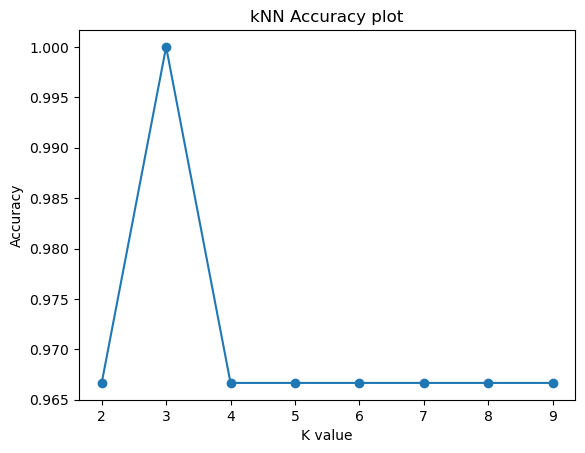

In [64]:
plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [65]:
# for k=3
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [66]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [67]:
y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [68]:
df = pd.DataFrame()
df['ytest'] = y_test
df['ypred'] = y_pred
df

,ytest,ypred
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [69]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_test,y_pred)
accu

1.0

In [70]:

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

model= lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

<Axes: >

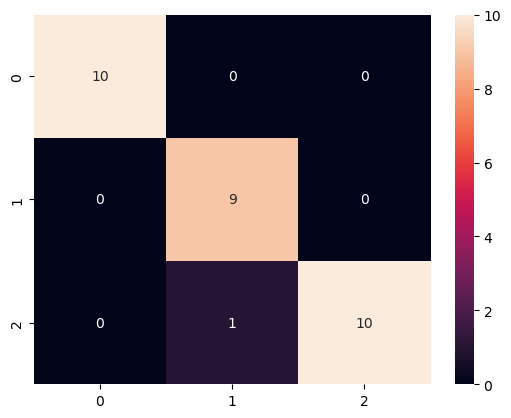

In [72]:
sns.heatmap(cm,annot=True)

In [73]:
# for example
#model.predict([[2.3,4.5,1.2,3.4]])

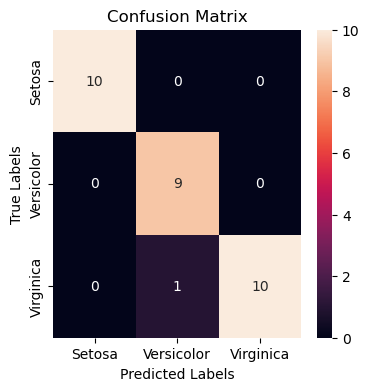

In [74]:
plt.figure(figsize=(4,4))
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Setosa","Versicolor","Virginica"])
ax.yaxis.set_ticklabels(["Setosa","Versicolor","Virginica"])
plt.show()

In [75]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

model= lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [76]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [77]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 96.67


In [78]:
from sklearn.svm import SVC
svclf=SVC(kernel='rbf')
model=svclf.fit(X_train, y_train)
y_pred = svclf.predict(X_test)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)

0.9666666666666667

In [79]:
from sklearn.svm import SVC
svclf=SVC(kernel='poly') # polynomial kernal
model=svclf.fit(X_train, y_train)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)

0.9666666666666667

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier()
rfclf.fit(X_train, y_train)
y_pred =rfclf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9666666666666667

In [81]:
y_pred=np.array(y_pred)

In [82]:
len(y_pred)

30